
## Credit Card Fraud Detection


### Import Necessary libraries

In [2]:
! pip install imblearn


[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_recall_curve,
    roc_auc_score,
    average_precision_score,precision_score, recall_score, f1_score
)

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")


### Load Dataset

In [3]:

# Update path if needed
df = pd.read_csv("C:/Users/Asus/Desktop/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Basic EDA

In [4]:

print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nClass Distribution:\n", df['Class'].value_counts(normalize=True))

Shape: (284807, 31)

Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class Distribution:
 Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


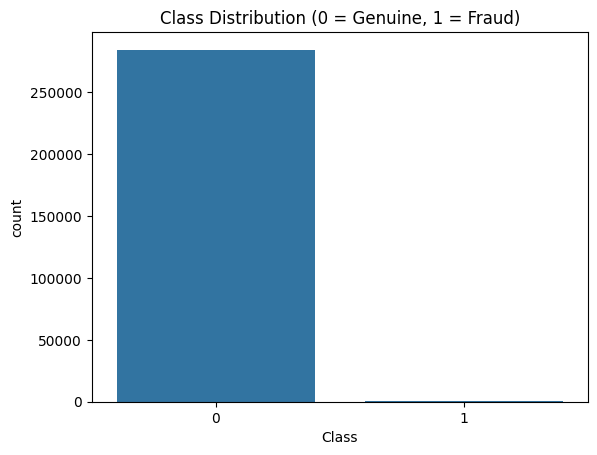

In [5]:

sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Genuine, 1 = Fraud)")
plt.show()

It shows that the dataset is highly imbalanced.

#### Train-test Split

In [6]:

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (227845, 30)
Testing data shape: (56962, 30)


### Feature Scaling

In [7]:

scaler = StandardScaler()

X_train[['Amount', 'Time']] = scaler.fit_transform(X_train[['Amount', 'Time']])
X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])


### Handle Class Imbalance (using SMOTE)

In [8]:

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE:")
print(y_train_resampled.value_counts())


After SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


### Logistic Regression

In [9]:

lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_resampled, y_train_resampled)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]



# Reports
print("Logistic Regression Results:\n")
print("Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_lr))

print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))

print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print("PR-AUC:", average_precision_score(y_test, y_prob_lr))

Logistic Regression Results:

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Precision: 0.058027079303675046
Recall: 0.9183673469387755
F1 Score: 0.1091570648878108
ROC-AUC: 0.9698631105509169
PR-AUC: 0.7249139606556327


##### Confusion Matrix (Logistic regression)

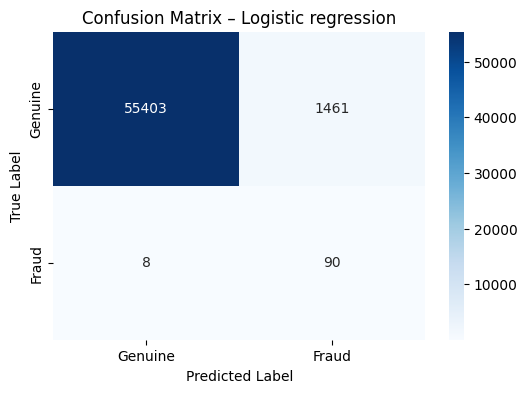

In [10]:
# Confusion Matrix 
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_lr,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Genuine', 'Fraud'],
    yticklabels=['Genuine', 'Fraud']
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Logistic regression")
plt.show()


### Random Forest

In [11]:

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

rf.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

#### Random Forest Results

In [13]:
print("Random Forest Results:\n")
print(classification_report(y_test, y_pred_rf))

print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print("PR-AUC:", average_precision_score(y_test, y_prob_rf))


Random Forest Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Precision: 0.8631578947368421
Recall: 0.8367346938775511
F1 Score: 0.8497409326424871
ROC-AUC: 0.9753984264640014
PR-AUC: 0.8748623252501219


##### Confusion Matrix (Random Forest)

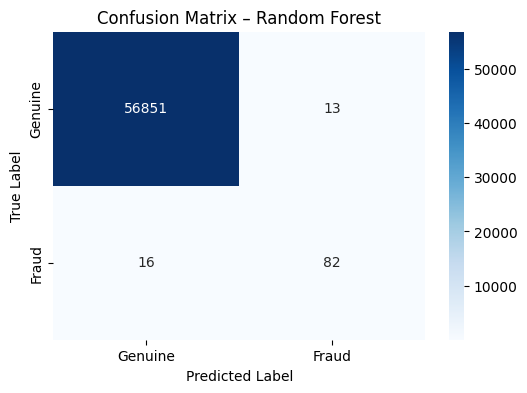

In [14]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Genuine', 'Fraud'],
    yticklabels=['Genuine', 'Fraud']
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Random Forest")
plt.show()


#### Comparison Table

In [15]:
comparison_table = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-score", "ROC-AUC", "PR-AUC"],
    "Logistic Regression": [
        precision_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_lr),
        roc_auc_score(y_test, y_prob_lr),
        average_precision_score(y_test, y_prob_lr)
    ],
    "Random Forest": [
        precision_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_rf),
        roc_auc_score(y_test, y_prob_rf),
        average_precision_score(y_test, y_prob_rf)
    ]
})

comparison_table


,Metric,Logistic Regression,Random Forest
0,Precision,0.058027,0.863158
1,Recall,0.918367,0.836735
2,F1-score,0.109157,0.849741
3,ROC-AUC,0.969863,0.975398
4,PR-AUC,0.724914,0.874862


The results show a clear performance difference between Logistic Regression and Random Forest on the fraud detection task. Logistic Regression achieves very high recall (0.92), meaning it detects most fraudulent transactions. However, its extremely low precision (0.06) indicates that most transactions flagged as fraud are actually genuine. This leads to many false alarms, making it impractical.
On the other hand, the Random Forest model provides a strong balance between precision (0.86) and recall (0.84). A high F1-score (0.85) means it successfully detects fraud while keeping false positives low. Additionally, Random Forest achieves higher ROC-AUC (0.98) and PR-AUC (0.87), confirming superior performance on imbalanced data.

Therefore, Random Forest is more reliable overall.


## Conclusion
#### The dataset was highly imbalanced and handled using SMOTE.
#### Logistic Regression and Random Forest models were trained.
#### Random Forest achieved better fraud detection performance.
#### Precision, Recall, and F1-score were used for evaluation as they are suitable for imbalanced datasets.